In [1]:
# HPC
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

# For surfvel data in tif files
import rasterio
from rasterio.transform import from_origin

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
xModel10 = np.arange(-72.,97.,1.0)*10
yModel10 = np.arange(-345.,-56.,1.0)*10
xModel16 = np.arange(-72.,97.,1.6)*10
yModel16 = np.arange(-345.,-56.,1.6)*10
xModel40 = np.arange(-72.,97.,4.0)*10
yModel40 = np.arange(-345.,-56.,4.0)*10

dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_age  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')

!rm /scratch2/shreyas/GrIS_paleo_data/RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc
ds_age_correct = ageData.correctAgeDataset(ds_age,
                            path = dataPath,
                            filename = 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc',
                            zetaLevels = 26,
                            unCorrupt = True)
ds_age_correct = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc')
ds_bm5 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/BedMachineGreenland-v5.nc")
ds_bm5_orig = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms_orig.nc")
ds_age_old = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms_old.nc")

modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['units'] = 'a'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['standard_name'] = 'land_ice_kc_layer_age_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['long_name'] = 'Age uncertainty in the upper (kc) ice layer'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['grid_mapping'] = 'mapping'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['units'] = 'a'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['standard_name'] = 'land_ice_kc_layer_age_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['long_name'] = 'Age uncertainty in the upper (kc) ice layer'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['standard_name'] = 'land_ice_thickness_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['long_name'] = 'Ice thickness uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs']*0.0 + 5.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['standard_name'] = 'land_ice_surface_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['long_name'] = 'Ice surface uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].copy()
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['standard_name'] = 'land_ice_bed_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['long_name'] = 'Ice bed uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp.to_netcdf('/scratch2/shreyas/GrIS_paleo_data/fake_age_data_40kms.nc', mode='w')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp.to_netcdf('/scratch2/shreyas/GrIS_paleo_data/fake_bm5_data_40kms.nc', mode='w')

Uncorrupt z=1.
Uncorrupt z=2.
Uncorrupt z=3.


In [3]:
# -----------------------------
# Geometry helper
def frac_area(x, y, xx, yy):
    x = np.sort(x)
    y = np.sort(y)
    xx = np.sort(xx)
    yy = np.sort(yy)
    dx_inv = 1.0 / (x[1] - x[0])
    dy_inv = 1.0 / (y[1] - y[0])
    xxm = (np.array(xx) - x[0]) * dx_inv
    yym = (np.array(yy) - y[0]) * dy_inv
    if (xxm[1] - xxm[0] > 1) or (yym[1] - yym[0] > 1):
        return 0.0
    if 0 <= xxm[0] and xxm[1] <= 1 and 0 <= yym[0] and yym[1] <= 1:
        return 1.0
    if 0 <= xxm[0] and xxm[1] <= 1:
        if yym[0] < 0 < yym[1]:
            return yym[1] / (yym[1] - yym[0])
        elif yym[0] < 1 < yym[1]:
            return (1 - yym[0]) / (yym[1] - yym[0])
        return 0.0
    if 0 <= yym[0] and yym[1] <= 1:
        if xxm[0] < 0 < xxm[1]:
            return xxm[1] / (xxm[1] - xxm[0])
        elif xxm[0] < 1 < xxm[1]:
            return (1 - xxm[0]) / (xxm[1] - xxm[0])
        return 0.0
    denom = (xxm[1] - xxm[0]) * (yym[1] - yym[0])
    if denom == 0:
        return 0.0
    if xxm[0] < 0 < xxm[1] and yym[0] < 0 < yym[1]:
        return xxm[1] * yym[1] / denom
    if xxm[0] < 1 < xxm[1] and yym[0] < 0 < yym[1]:
        return (1 - xxm[0]) * yym[1] / denom
    if xxm[0] < 0 < xxm[1] and yym[0] < 1 < yym[1]:
        return xxm[1] * (1 - yym[0]) / denom
    if xxm[0] < 1 < xxm[1] and yym[0] < 1 < yym[1]:
        return (1 - xxm[0]) * (1 - yym[0]) / denom
    return 0.0

# -----------------------------
# Area-weighted downsampling (H + mask)
def area_weighted_downsample_with_mask_H(H_hr, mask_hr, x_hr, y_hr, x_lr, y_lr, dx_lr, dx_hr):
    shape = (len(y_lr), len(x_lr))
    H_lr = np.zeros(shape)
    r_masks = {k: np.zeros(shape) for k in range(5)}  # 0–4: grounded, land, ocean, floating, nongrlld

    for j, y in enumerate(y_lr):
        for i, x in enumerate(x_lr):
            x1, x2 = x - 0.5*(dx_lr + dx_hr), x + 0.5*(dx_lr + dx_hr)
            y1, y2 = y - 0.5*(dx_lr + dx_hr), y + 0.5*(dx_lr + dx_hr)
            ii1 = int(np.floor((x1 - x_hr[0]) / dx_hr))
            ii2 = int(np.ceil((x2 - x_hr[0]) / dx_hr))
            jj1 = int(np.floor((y1 - y_hr[0]) / dx_hr))
            jj2 = int(np.ceil((y2 - y_hr[0]) / dx_hr))

            H_sum = 0.0
            w_sum = 0.0
            mask_sum = np.zeros(5)

            for jj in range(jj1, jj2):
                for ii in range(ii1, ii2):
                    if 0 <= ii < len(x_hr) and 0 <= jj < len(y_hr):
                        w = frac_area(
                            [x - 0.5*dx_lr, x + 0.5*dx_lr],
                            [y - 0.5*dx_lr, y + 0.5*dx_lr],
                            [x_hr[ii] - 0.5*dx_hr, x_hr[ii] + 0.5*dx_hr],
                            [y_hr[jj] - 0.5*dx_hr, y_hr[jj] + 0.5*dx_hr]
                        )
                        H_sum += w * H_hr[jj, ii]
                        mval = mask_hr[jj, ii]
                        if 0 <= mval <= 4:
                            mask_sum[mval] += w
                        w_sum += w

            if w_sum > 0:
                H_lr[j, i] = H_sum / w_sum
                for k in range(5):
                    r_masks[k][j, i] = mask_sum[k] / w_sum
    return H_lr, r_masks

# -----------------------------
# Downsample 3D fields with a given mask
def downsample_3d_field_with_mask(field_hr, x_hr, y_hr, x_lr, y_lr, dx_lr, mask_sico, coverage_thresh=0.5):
    nz = field_hr.shape[0]
    field_lr = np.full((nz, len(y_lr), len(x_lr)), np.nan)
    dx_hr = x_hr[1] - x_hr[0]

    for j, y in enumerate(y_lr):
        for i, x in enumerate(x_lr):
            # if not ((mask_sico[j, i] == 0) or (mask_sico[j, i] == 3)):
            #     continue  # valid only over grounded or floating ice

            x1, x2 = x - 0.5 * dx_lr, x + 0.5 * dx_lr
            y1, y2 = y - 0.5 * dx_lr, y + 0.5 * dx_lr
            ii1 = int(np.floor((x1 - x_hr[0]) / dx_hr))
            ii2 = int(np.ceil((x2 - x_hr[0]) / dx_hr))
            jj1 = int(np.floor((y1 - y_hr[0]) / dx_hr))
            jj2 = int(np.ceil((y2 - y_hr[0]) / dx_hr))

            for k in range(nz):
                v_sum, count_valid, total = 0.0, 0, 0
                for jj in range(jj1, jj2):
                    for ii in range(ii1, ii2):
                        if 0 <= ii < len(x_hr) and 0 <= jj < len(y_hr):
                            val = field_hr[k, jj, ii]
                            if np.isfinite(val):
                                v_sum += val
                                count_valid += 1
                            total += 1
                if total > 0 and (count_valid / total) >= coverage_thresh:
                    field_lr[k, j, i] = v_sum / count_valid
    return field_lr

# Ocean connectivity
def ocean_connectivity(mask, imax, jmax, zs=None):
    mask_c = np.zeros((jmax + 1, imax + 1), dtype=np.int16)
    mask_c[0:2, :] = 1
    mask_c[-2:, :] = 1
    mask_c[:, 0:2] = 1
    mask_c[:, -2:] = 1

    flag_change = True
    while flag_change:
        mask_c_save = mask_c.copy()
        for j in range(1, jmax):
            for i in range(1, imax):
                if mask_c_save[j, i] == 1:
                    for dj in [-1, 0, 1]:
                        for di in [-1, 0, 1]:
                            nj, ni = j + dj, i + di
                            if 0 <= nj <= jmax and 0 <= ni <= imax:
                                if mask[nj, ni] >= 2:
                                    mask_c[nj, ni] = 1
                                if zs is not None and mask[nj, ni] <= 1 and zs[nj, ni] < 0.0:
                                    mask_c[nj, ni] = 1
        flag_change = not np.array_equal(mask_c, mask_c_save)

    return mask_c

In [4]:
# Flip BedMachine y-axis
y_bm = ds_bm5["y"].values[::-1] / 1000.0
x_bm = ds_bm5["x"].values / 1000.0
mask_bm = np.flip(ds_bm5["mask"].values, axis=0).astype(np.int16)

# Extract age grid
x_age = ds_age_correct["xMesh"].values[0]
y_age = ds_age_correct["yMesh"].values[:, 0]
dx_age = x_age[1] - x_age[0]
dx_bm = x_bm[1] - x_bm[0]

# Apply regional blanking to BedMachine mask
regions = [
    (np.array([x_bm[0], -1190.0]), np.array([110.0, y_bm[-1]])),    # Ellesmere
    (np.array([400.0, y_bm[-1]]), np.array([x_bm[-1], -900.0])),    # Svalbard
    (np.array([x_bm[-1], -2250.0]), np.array([250.0, y_bm[0]])),    # Iceland
    (np.array([-300.0, y_bm[0]]), np.array([x_bm[0], -2000.0]))     # Baffin
]
for p1, p2 in regions:
    v = p2 - p1
    for j in range(len(y_bm)):
        for i in range(len(x_bm)):
            test = np.array([x_bm[i], y_bm[j]]) - p1
            if v[0]*test[1] - v[1]*test[0] > 0:
                mask_bm[j, i] = 4

# Interpolate via area-weighted majority vote
mask_down = np.zeros((len(y_age), len(x_age)), dtype=np.int16)
for j, y in enumerate(y_age):
    for i, x in enumerate(x_age):
        x1, x2 = x - 0.5 * dx_age, x + 0.5 * dx_age
        y1, y2 = y - 0.5 * dx_age, y + 0.5 * dx_age
        ii1 = int(np.floor((x1 - x_bm[0]) / dx_bm))
        ii2 = int(np.ceil((x2 - x_bm[0]) / dx_bm))
        jj1 = int(np.floor((y1 - y_bm[0]) / dx_bm))
        jj2 = int(np.ceil((y2 - y_bm[0]) / dx_bm))

        counts = np.zeros(5)  # 0: grounded, 1: land, 2: ocean, 3: floating, 4: non-Greenland
        for jj in range(jj1, jj2):
            for ii in range(ii1, ii2):
                if 0 <= ii < len(x_bm) and 0 <= jj < len(y_bm):
                    mval = mask_bm[jj, ii]
                    if 0 <= mval <= 4:
                        counts[mval] += 1

        if counts.sum() > 0:
            mask_down[j, i] = int(np.argmax(counts))
        else:
            mask_down[j, i] = 2  # Default to ocean if empty

In [5]:
# Load high-res data
age_hr = ds_age_correct["age_c"].values  # shape: (nz, ny_hr, nx_hr)
age_uncert_hr = ds_age_correct["age_c_uncert"].values
H_hr = ds_age_correct["H"].values      # shape: (ny_hr, nx_hr)

# Define low-res target grid (e.g., from SICOPOLIS)
x_sico = np.arange(-720, 960 + 40, 40)  # in km
y_sico = np.arange(-3450, -570 + 40, 40)
dx_sico = 40.0  # km

# Downsample H using area-weighted average + mask
H_lr, r_masks = area_weighted_downsample_with_mask_H(
    H_hr, mask_down, x_age, y_age, x_sico, y_sico, dx_sico, dx_age
)

# Construct final majority-vote mask (same method as before)
stack = np.stack([r_masks[k] for k in range(5)])  # order: 0–4
mask_sico = np.take([0, 3, 1, 2, 2], np.argmax(stack, axis=0))  # SICOPOLIS order: 0 grounded, 1 land, 2 ocean, 3 floating

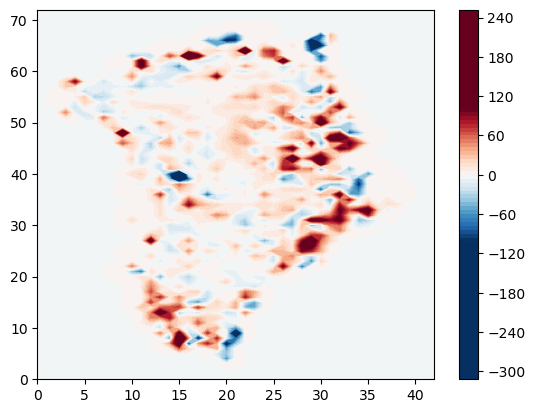

In [6]:
plt.contourf(H_lr-ds_bm5_orig["H"].data, cmap = "RdBu_r", vmin = -100, vmax = 100, levels = 100)
plt.colorbar()

In [7]:
# Downsample age and age_uncert using the same mask (only where grounded or floating)
age_lr = downsample_3d_field_with_mask(
    age_hr, x_age, y_age, x_sico, y_sico, dx_sico, mask_sico, coverage_thresh=0.5
)

age_uncert_lr = downsample_3d_field_with_mask(
    age_uncert_hr, x_age, y_age, x_sico, y_sico, dx_sico, mask_sico, coverage_thresh=0.5
)

print("Downsampling complete.")

Downsampling complete.


In [8]:
for j in range(len(y_sico)):
    for i in range(len(x_sico)):
        age_lr[:, j, i] = ageData.interpolate_nans(age_lr[:, j, i], bool_uncert = False)

age_uncert_lr_1 = np.copy(age_uncert_lr)
for j in range(len(y_sico)):
    for i in range(len(x_sico)):
        # Update age_uncert_lr_1 first before age_uncert_lr gets updated
        age_uncert_lr_1[:, j, i] = ageData.interpolate_nans(age_uncert_lr[:, j, i], bool_uncert = True)
        age_uncert_lr[:, j, i] = ageData.interpolate_nans(age_uncert_lr[:, j, i], bool_uncert = False)

In [9]:
zeta_data = np.arange(0,1+1./25,1./25)
zeta = np.arange(0,1+1./80,1./80)
sigma = dataCleaner.exp_sigma_level(zeta = np.arange(0,1+1./80,1./80),
                                    exponent = 2.0)

da_age_c = xr.DataArray(
        data = age_lr,
        dims = ["sigma", "y", "x"],
        coords = dict(
            sigma = zeta_data,
            y = yModel40,
            x = xModel40,
        ),  
        attrs = dict(description="age_c in a"),
    )

da_age_c_uncert_unbounded = xr.DataArray(
        data = age_uncert_lr,
        dims = ["sigma", "y", "x"],
        coords = dict(
            sigma = zeta_data,
            y = yModel40,
            x = xModel40,
        ),  
        attrs = dict(description="age_c_uncert in a"),
    )

da_age_c_uncert_unbounded_rigorous = xr.DataArray(
        data = age_uncert_lr_1,
        dims = ["sigma", "y", "x"],
        coords = dict(
            sigma = zeta_data,
            y = yModel40,
            x = xModel40,
        ),  
        attrs = dict(description="age_c_uncert (rigorous calculation i.e. variances are additive) in a"),
    )

da_H = xr.DataArray(
        data = H_lr,
        dims = ["y", "x"],
        coords = dict(
            y = yModel40,
            x = xModel40,
        ),  
        attrs = dict(description="Thickness in m"),
    )

ds_age_40kms = xr.Dataset(
    data_vars=dict(
        age_c=da_age_c,
        age_c_uncert_unbounded=da_age_c_uncert_unbounded,
        age_c_uncert_unbounded_rigorous=da_age_c_uncert_unbounded_rigorous,
        H=da_H
    ),
    attrs=dict(
        title="Downsampled age, uncertainty, and thickness",
        description="Processed from corrected age data on to SICOPOLIS 40 km grid",
        units="age in years, thickness in meters"
    )
)

ds_age_40kms = ds_age_40kms.interp(sigma=sigma, method = "linear")
ds_age_40kms["age_c"].data[-1, :, :] = 0.0
ds_age_40kms["age_c"].data[np.isnan(ds_age_40kms["age_c"].data)] = -999.0
ds_age_40kms["age_c_uncert_unbounded"].data[np.isnan(ds_age_40kms["age_c_uncert_unbounded"].data)] = -2.e9
ds_age_40kms["age_c_uncert_unbounded_rigorous"].data[np.isnan(ds_age_40kms["age_c_uncert_unbounded_rigorous"].data)] = -2.e9

ratio = np.abs(ds_age_40kms["age_c"].data/ds_age_40kms["age_c_uncert_unbounded"].data)
ds_age_40kms["age_c_uncert"] = ds_age_40kms["age_c_uncert_unbounded"].copy()
ds_age_40kms["age_c_uncert"].data[ratio > 20] = 0.05*ds_age_40kms["age_c"].data[ratio > 20]

ratio = np.abs(ds_age_40kms["age_c"].data/ds_age_40kms["age_c_uncert_unbounded_rigorous"].data)
ds_age_40kms["age_c_uncert_rigorous"] = ds_age_40kms["age_c_uncert_unbounded_rigorous"].copy()
ds_age_40kms["age_c_uncert_rigorous"].data[ratio > 20] = 0.05*ds_age_40kms["age_c"].data[ratio > 20]

!rm /scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc
ds_age_40kms.to_netcdf("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc")